In [1]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
from os import listdir
from datetime import datetime
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

C:\Users\Josefina Urquiza\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [19]:
#Plot MAIAC USA
data = pd.read_csv("D:/Josefina/paper_git/paper_maiac/datasets/processed/USA/GSFC-25KM-MAIAC-60-AER.csv")
data["Timestamp"] = data["Date_MODIS"].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
data

,Unnamed: 0,Date_MODIS,timestamp,satellite,AOD_470,AOD_550_maiac,uncert,date_AERO,AOD_550_AER_mean,AOD_550_AER_median,AOD_550_AER_sd,AOD_550_AER_dim,Timestamp
0,2,2015-01-01,2015-01-01 15:40:00,T,0.08802,0.06336,0.0091,2015-01-01,0.043727,0.043959,0.001777,9,2015-01-01
1,3,2015-01-01,2015-01-01 17:15:00,A,0.04632,0.03355,0.0031,2015-01-01,0.058400,0.055502,0.018003,4,2015-01-01
2,4,2015-01-01,2015-01-01 18:55:00,A,0.02668,0.01917,0.0062,2015-01-01,0.057665,0.053115,0.020082,3,2015-01-01
3,18,2015-01-05,2015-01-05 16:50:00,T,0.02216,0.01635,0.0039,2015-01-05,0.048809,0.039202,0.021587,6,2015-01-05
4,19,2015-01-05,2015-01-05 18:30:00,A,0.04174,0.02996,0.0127,2015-01-05,0.027747,0.026189,0.003821,10,2015-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,10333,2022-11-13,2022-11-13 16:05:00,T,0.05443,0.03903,0.0116,2022-11-13,0.033616,0.033222,0.007544,13,2022-11-13
2435,10334,2022-11-13,2022-11-13 17:55:00,A,0.07549,0.05459,0.0098,2022-11-13,0.034333,0.033863,0.005059,12,2022-11-13
2436,10335,2022-11-14,2022-11-14 15:10:00,T,0.08189,0.05930,0.0071,2022-11-14,0.046518,0.044258,0.008136,11,2022-11-14
2437,10338,2022-11-14,2022-11-14 18:40:00,A,0.06693,0.04813,0.0126,2022-11-14,0.053789,0.052386,0.004988,14,2022-11-14


In [20]:
#Becomes the index column
data.set_index('Timestamp', inplace = True)
# Media diaria
data_mean  = data.resample('1D').mean()
#The days of the study period are completed
data_mean_period = data_mean ['2015-01-01':'2022-12-31']
data_mean_period_len =len(data_mean_period.dropna(how='all'))
# Media MAIAC
mean = data_mean_period['AOD_550_maiac'].mean()   
data_mean_period

,Unnamed: 0,AOD_470,AOD_550_maiac,uncert,AOD_550_AER_mean,AOD_550_AER_median,AOD_550_AER_sd,AOD_550_AER_dim
Timestamp,,,,,,,,
2015-01-01,3.0,0.053673,0.038693,0.006133,0.053264,0.050858,0.013287,5.333333
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,18.5,0.031950,0.023155,0.008300,0.038278,0.032696,0.012704,8.000000
...,...,...,...,...,...,...,...,...
2022-11-12,10330.0,0.139965,0.101410,0.010550,0.111939,0.105861,0.019774,7.500000
2022-11-13,10333.5,0.064960,0.046810,0.010700,0.033975,0.033542,0.006302,12.500000
2022-11-14,10336.5,0.074410,0.053715,0.009850,0.050154,0.048322,0.006562,12.500000


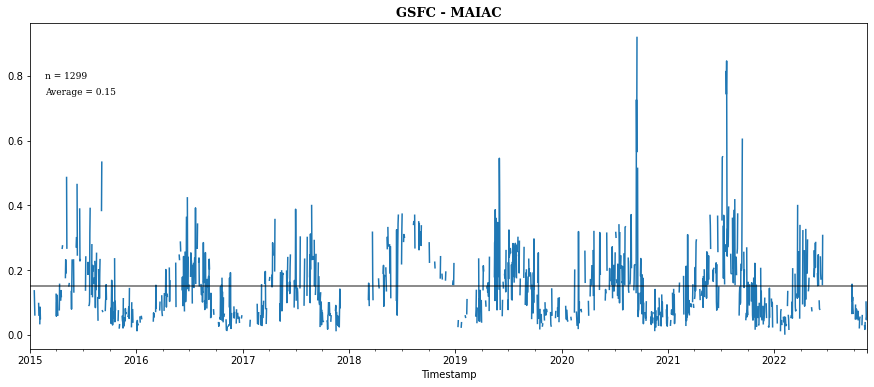

In [38]:
data_mean_period['AOD_550_maiac'].plot(figsize=(15, 6))
plt.axhline(y=mean, color= "black",linewidth=1.5, alpha=0.6, linestyle = '-')
plt.text(data_mean_period.index[50],0.8, "n =" +" "+ str(data_mean_period_len),  
    ha="left", va="center",fontdict={'family': 'serif', 
    'color' : 'Black',
    #'weight': 'bold',
    'size': 9})
# Daily average text
plt.text(data_mean_period.index[50],0.75, "Average =" +" "+ str(round(data_mean_period['AOD_550_maiac'].mean(),2)),  
    ha="left", va="center",fontdict={'family': 'serif', 
    'color' : 'Black',
    'size': 9})
Format = mdates.DateFormatter('%m-%y')
plt.title("GSFC - MAIAC",fontsize=13,fontdict={'family': 'serif', 
    'color' : 'Black',
    'weight': 'bold',
    'size': 16})
plt.show()

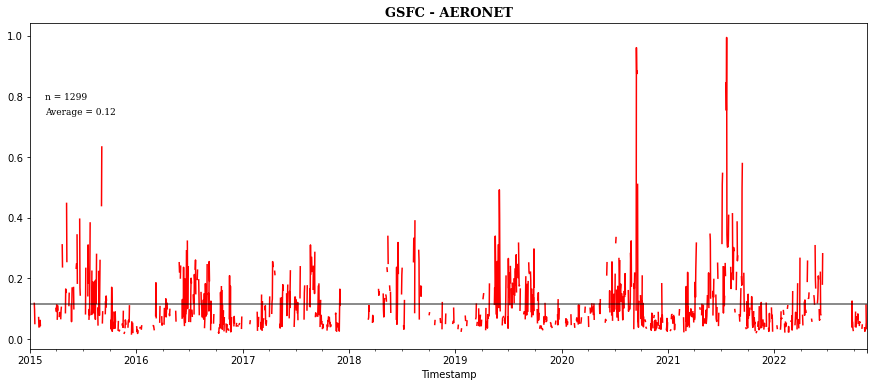

In [40]:
data_mean_period['AOD_550_AER_mean'].plot(figsize=(15, 6),color="red")
mean_AER = data_mean_period['AOD_550_AER_mean'].mean()   
plt.axhline(y=mean_AER, color= "black",linewidth=1.5, alpha=0.6, linestyle = '-')
plt.text(data_mean_period.index[50],0.8, "n =" +" "+ str(data_mean_period_len),  
    ha="left", va="center",fontdict={'family': 'serif', 
    'color' : 'Black',
    #'weight': 'bold',
    'size': 9})
# Daily average text
plt.text(data_mean_period.index[50],0.75, "Average =" +" "+ str(round(data_mean_period['AOD_550_AER_mean'].mean(),2)),  
    ha="left", va="center",fontdict={'family': 'serif', 
    'color' : 'Black',
    'size': 9})
Format = mdates.DateFormatter('%m-%y')
plt.title("GSFC - AERONET",fontsize=13,fontdict={'family': 'serif', 
    'color' : 'Black',
    'weight': 'bold',
    'size': 16})
plt.show()

Text(1.0, 0.1, '2439')

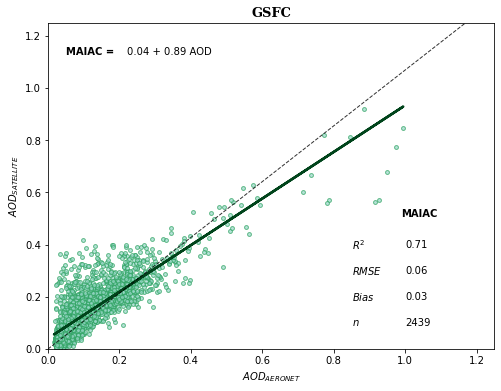

In [40]:
# Regresion lineal
# Leer archivo
data = pd.read_csv("D:/Josefina/paper_git/paper_maiac/datasets/processed/USA/GSFC-25KM-MAIAC-60-AER.csv")
#Poner como indice al date
data["Timestamp"] = data["Date_MODIS"].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
data.set_index('Timestamp', inplace = True)
# Calculo el len
data_mean_period_len =len(data.dropna(how='all'))
 ########################                VARIABLES                ########################
y_maiac = data["AOD_550_maiac"]
x = data["AOD_550_AER_mean"]
# Mascara nans
mask = ~np.isnan(x) & ~np.isnan(y_maiac)
x = x[mask]
y_maiac = y_maiac[mask]
#numero de datos sin contar los NaNs
n = len(x)
#Calculo la pendiente, la ordenada al origen y el R2
slope_maiac , intercept_maiac , r_maiac , p_maiac , stderr_maiac  = scipy.stats.linregress(x , y_maiac)
# R2
R2_maiac=r_maiac*r_maiac

#Calculo RMSE
RMSE_maiac = mean_squared_error(y_maiac, x, squared = False)
# Calculo bias
bias_maiac = round(( sum(y_maiac - x)/n),2)

########################                PREDICT                ########################
y_maiac_p= data["AOD_550_maiac"].values.reshape(-1,1)
x_p= data["AOD_550_AER_mean"].values.reshape(-1,1)
linear_regresion_maiac = LinearRegression()
linear_regresion_maiac.fit(x_p,y_maiac_p)
li_predict_maiac = linear_regresion_maiac.predict(x_p)

########################                PLOT                ########################

fig,axes=plt.subplots(1,1,figsize=(8,6))
#plt.figure(figsize=(10,8))
# Figure
#Scatter plot Unit vs Ref
axes.scatter(x, y_maiac,  c="#99d8c9" ,edgecolors="#2ca25f",alpha=0.7,  s=15)
axes.plot(x_p,li_predict_maiac,c="#00441b",label='Valores Originales',linestyle="-",linewidth=2.5)
#add the line 1:1
axes.plot([0, 1.45], [0,1.55], color='black', linewidth=1, alpha=0.8, linestyle = '--')
#Ticks
axes.yaxis.set_ticks(np.arange(0, 1.22, 0.2))
axes.xaxis.set_ticks(np.arange(0, 1.22, 0.2))
axes.set_xlim(0, 1.25)
axes.set_ylim(0, 1.25)
        
# Title of each subplot corresponds to the name of the AERONET station.
axes.set_title("GSFC",fontsize=13,fontdict={'family': 'serif', 
    'color' : 'Black',
    'weight': 'bold',
    'size': 16})

# Axes names
axes.set_xlabel(r'$AOD_{AERONET}$',size=10)
axes.set_ylabel(r'$AOD_{SATELLITE}$',size=10)
########################                TEXTO                ########################
## Linear regression equation

axes.text(0.05, 1.12, "MAIAC =", fontsize=10, ha="left", va="bottom",fontweight = "bold")
axes.text(0.22, 1.12, (str(round (intercept_maiac,2)) + " + "+ str(round (slope_maiac,2))+ " AOD") , fontsize=10, ha="left", va="bottom")#, bbox=dict(boxstyle="round", fc=(1.0, 0.99, 0.99)))

# Statistics by station
axes.text(1.04, 0.5, "MAIAC" , fontsize=10, ha="center", va="bottom",fontweight = "bold")
axes.text(0.85, 0.4, r'$R^{2} $ ', fontsize=10, ha="left", va="center")
axes.text(0.85, 0.30, r'$RMSE$ ',fontsize=10,ha="left", va="center")
axes.text(0.85, 0.2, r'$Bias$', fontsize=10,ha="left", va="center")
axes.text(0.85, 0.1, r'$n$    ', fontsize=10,ha="left", va="center")

# Statistics by station for  MAIAC
axes.text(1., 0.4,(round(R2_maiac,2)) , fontsize=10, ha="left", va="center")
axes.text(1., 0.30,   (round(RMSE_maiac,2)) , fontsize=10,ha="left", va="center")
axes.text(1., 0.2,  bias_maiac, fontsize=10,ha="left", va="center")#,
axes.text(1., 0.1,  n , fontsize=10,ha="left", va="center")

In [3]:
# linear regression
def linear_regression_plot (path, date_format,nrows,ncols,color_modis,color_maiac, plot):
    '''
    The function allows plotting the linear regression of each AERONET station.
    In addition, the main statistics and the linear regression equation are shown.
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columnas the plot will have
    - color palette for each  for stations MAIAC-MODIS For example: 
    color_modis = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"]
    color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"]
    '''
    i=0 
    j=0 
    edge_color_maiac = color_modis #["#004529", "#feb24c","#67000d","#081d58","#67001f","#4d004b"]
    #edge_color_modis = color_modis#["#41ab5d","#feb24c","#cb181d","#045a8d","#ce1256","#810f7c"]
    

    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(16,8),dpi=500)
    #The folder where the files of each station are located is browsed.
    for p,files in enumerate(os.listdir(path)):
        print(p)
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        
        #A column is created with the date called "Timestamp".
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #Becomes the index column
        data.set_index('Timestamp', inplace = True)
        data_mean_period_len =len(data.dropna(how='all'))
 
        # Station Name
        station_name = files [2:4]
        ########################                VARIABLES                ########################
        
        y_maiac = data ["AOD_550_maiac_mean"]
        #y_maiac= data["AOD_550_MAIAC_mean"]
        x= data["AOD_550_AER_mean"]
        
        mask = ~np.isnan(x) & ~np.isnan(y_maiac)#& ~np.isnan(y_modis)
        x= x[mask]
        y_maiac = y_maiac[mask]
        #y_modis = y_modis[mask]
        
        #numero de datos sin contar los NaNs
        n = len(x)
        #Calculo la pendiente, la ordenada al origen y el R2
        slope_maiac , intercept_maiac , r_maiac , p_maiac , stderr_maiac  = scipy.stats.linregress(x , y_maiac)
        #slope_modis , intercept_modis , r_modis , p_modis , stderr_modis  = scipy.stats.linregress(x , y_modis)

        # R2
        #R2_modis=r_modis*r_modis
                                                                                                               
        R2_maiac=r_maiac*r_maiac

        #Calculo RMSE
        #RMSE_modis = mean_squared_error(y_modis, x, squared = True)
        #RMSE_maiac = mean_squared_error(y_maiac, x, squared = True)
        #RMSE_modis = mean_squared_error(y_modis, x, squared = False)
        RMSE_maiac = mean_squared_error(y_maiac, x, squared = False)
        #bias_modis = round(( sum(y_modis - x)/n),2)
        bias_maiac = round(( sum(y_maiac - x)/n),2)
                
        ########################                PREDICT                ########################
            
        #y_modis_p = data ["AOD_550_MODIS_mean"].values.reshape(-1,1)
        y_maiac_p= data["AOD_550_maiac_mean"].values.reshape(-1,1)
        x_p= data["AOD_550_AER_mean"].values.reshape(-1,1)

        
        #linear_regresion_modis = LinearRegression()
        linear_regresion_maiac = LinearRegression()

        #linear_regresion_modis.fit(x_p,y_modis_p)
        linear_regresion_maiac.fit(x_p,y_maiac_p)

        li_predict_maiac = linear_regresion_maiac.predict(x_p)
        #li_predict_modis = linear_regresion_modis.predict(x_p)
        #print(files)
        ########################                PLOT                ########################
        # Figure
        #Scatter plot Unit vs Ref
        ax[i][j].scatter(x, y_maiac,  c=color_maiac[p] ,edgecolors=edge_color_maiac[p],alpha=0.7,  s=25, label="MAIAC")
        #ax[i][j].scatter(x, y_modis,  c=color_modis[p] ,edgecolors=edge_color_modis[p],alpha=0.7,  s=8)


        #ax[i][j].plot(x_p,li_predict_modis,c=color_modis[p],label='Valores Originales',linestyle="-",linewidth=2.5)
        ax[i][j].plot(x_p,li_predict_maiac,c="black",label='Valores Originales',linestyle="-",linewidth=2.5)
        
        #add the line 1:1
        ax[i][j].plot([0, 1.6], [0,1.6], color='black', linewidth=1, alpha=0.8, linestyle = '--', label="Line 1:1")
        #Ticks
        ax[i][j].yaxis.set_ticks(np.arange(0.2, 1.6, 0.4))
        ax[i][j].set_xlim(0, 1.6)
        ax[i][j].set_ylim(0, 1.6)
        
        ## Linear regression equation
        #ax[i][j].text(0.05, 1.4, "MODIS =" , fontsize=7, ha="left", va="bottom", fontweight = "bold")
        ax[i][j].text(0.05, 1.3, "MAIAC =", fontsize=9.5, ha="left", va="bottom",fontweight = "bold")
        #ax[i][j].text(0.3, 1.4, (str(round (intercept_modis,2)) + " + "+ str(round (slope_modis,2)) + " AOD") , fontsize=7, ha="left", va="bottom")#, bbox=dict(boxstyle="round", fc=(1.0, 0.99, 0.99)))
        ax[i][j].text(0.35, 1.3, (str(round (intercept_maiac,2)) + " + "+ str(round (slope_maiac,2))+ " AOD") , fontsize=9.5, ha="left", va="bottom")#, bbox=dict(boxstyle="round", fc=(1.0, 0.99, 0.99)))

        # Statistics by station
        #ax[i][j].text(1.20, 0.5, "MODIS" , fontsize=8, ha="center", va="bottom", fontweight = "bold")
        ax[i][j].text(1.45, 0.5, "MAIAC" , fontsize=9.5, ha="center", va="bottom",fontweight = "bold")
        ax[i][j].text(0.95, 0.4, r'$R^{2}$ ', fontsize=9.5, ha="left", va="center")
        ax[i][j].text(0.95, 0.30, r'$RMSE$ ',fontsize=9.5,ha="left", va="center")
        ax[i][j].text(0.95, 0.2, r'$Bias$', fontsize=9.5,ha="left", va="center")
        ax[i][j].text(0.95, 0.1, r'$n$    ', fontsize=9.5,ha="left", va="center")

        #Statistics by station for MODIS
        #ax[i][j].text(1.20, 0.4,(round(R2_modis,2)) , fontsize=8, ha="left", va="center")
        #ax[i][j].text(1.20, 0.30,  (round(RMSE_modis,2)) , fontsize=8,ha="left", va="center")
        #ax[i][j].text(1.20, 0.2, (round(bias_modis,2)) , fontsize=8,ha="left", va="center")#,
        #ax[i][j].text(1.20, 0.1, n , fontsize=8,ha="left", va="center")

        # Statistics by station for  MAIAC
        ax[i][j].text(1.40, 0.4,(round(R2_maiac,2)) , fontsize=9.5, ha="left", va="center")
        ax[i][j].text(1.40, 0.30,   (round(RMSE_maiac,2)) , fontsize=9.5,ha="left", va="center")
        ax[i][j].text(1.40, 0.2,  bias_maiac, fontsize=9.5,ha="left", va="center")#,
        ax[i][j].text(1.40, 0.1,  n , fontsize=9,ha="left", va="center")
         
        # Title of each subplot corresponds to the name of the AERONET station.
        ax[i][j].set_title(station_name,fontsize=15,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 16})
         # Tittle legend
        #tittle_legend = ["MODIS","MAIAC"]
        #ax[i][j].legend(tittle_legend , frameon = False, markerfirst = False, fontsize = 10,loc='upper right')
        #ax[i][j].legend(frameon = False, markerfirst = False, fontsize = 10,loc='upper right')
        # Axes names
        ax[i][j].set_xlabel(r'$AOD_{AERONET}$',size=12)
        ax[i][j].set_ylabel(r'$AOD_{SATELLITE}$',size=12)
        # Configuration of subplots
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)
        
        # Location of data in each subplot
        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
   # Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("linear_regression_plot.jpg", dpi=500))
    else:
        return(plt.show())

In [ ]:
colors =["#99d8c9","#fa9fb5","#a6bddb","#756bb1","#fec44f","#fc9272"], plot='save')


0
1
2
3
4
5


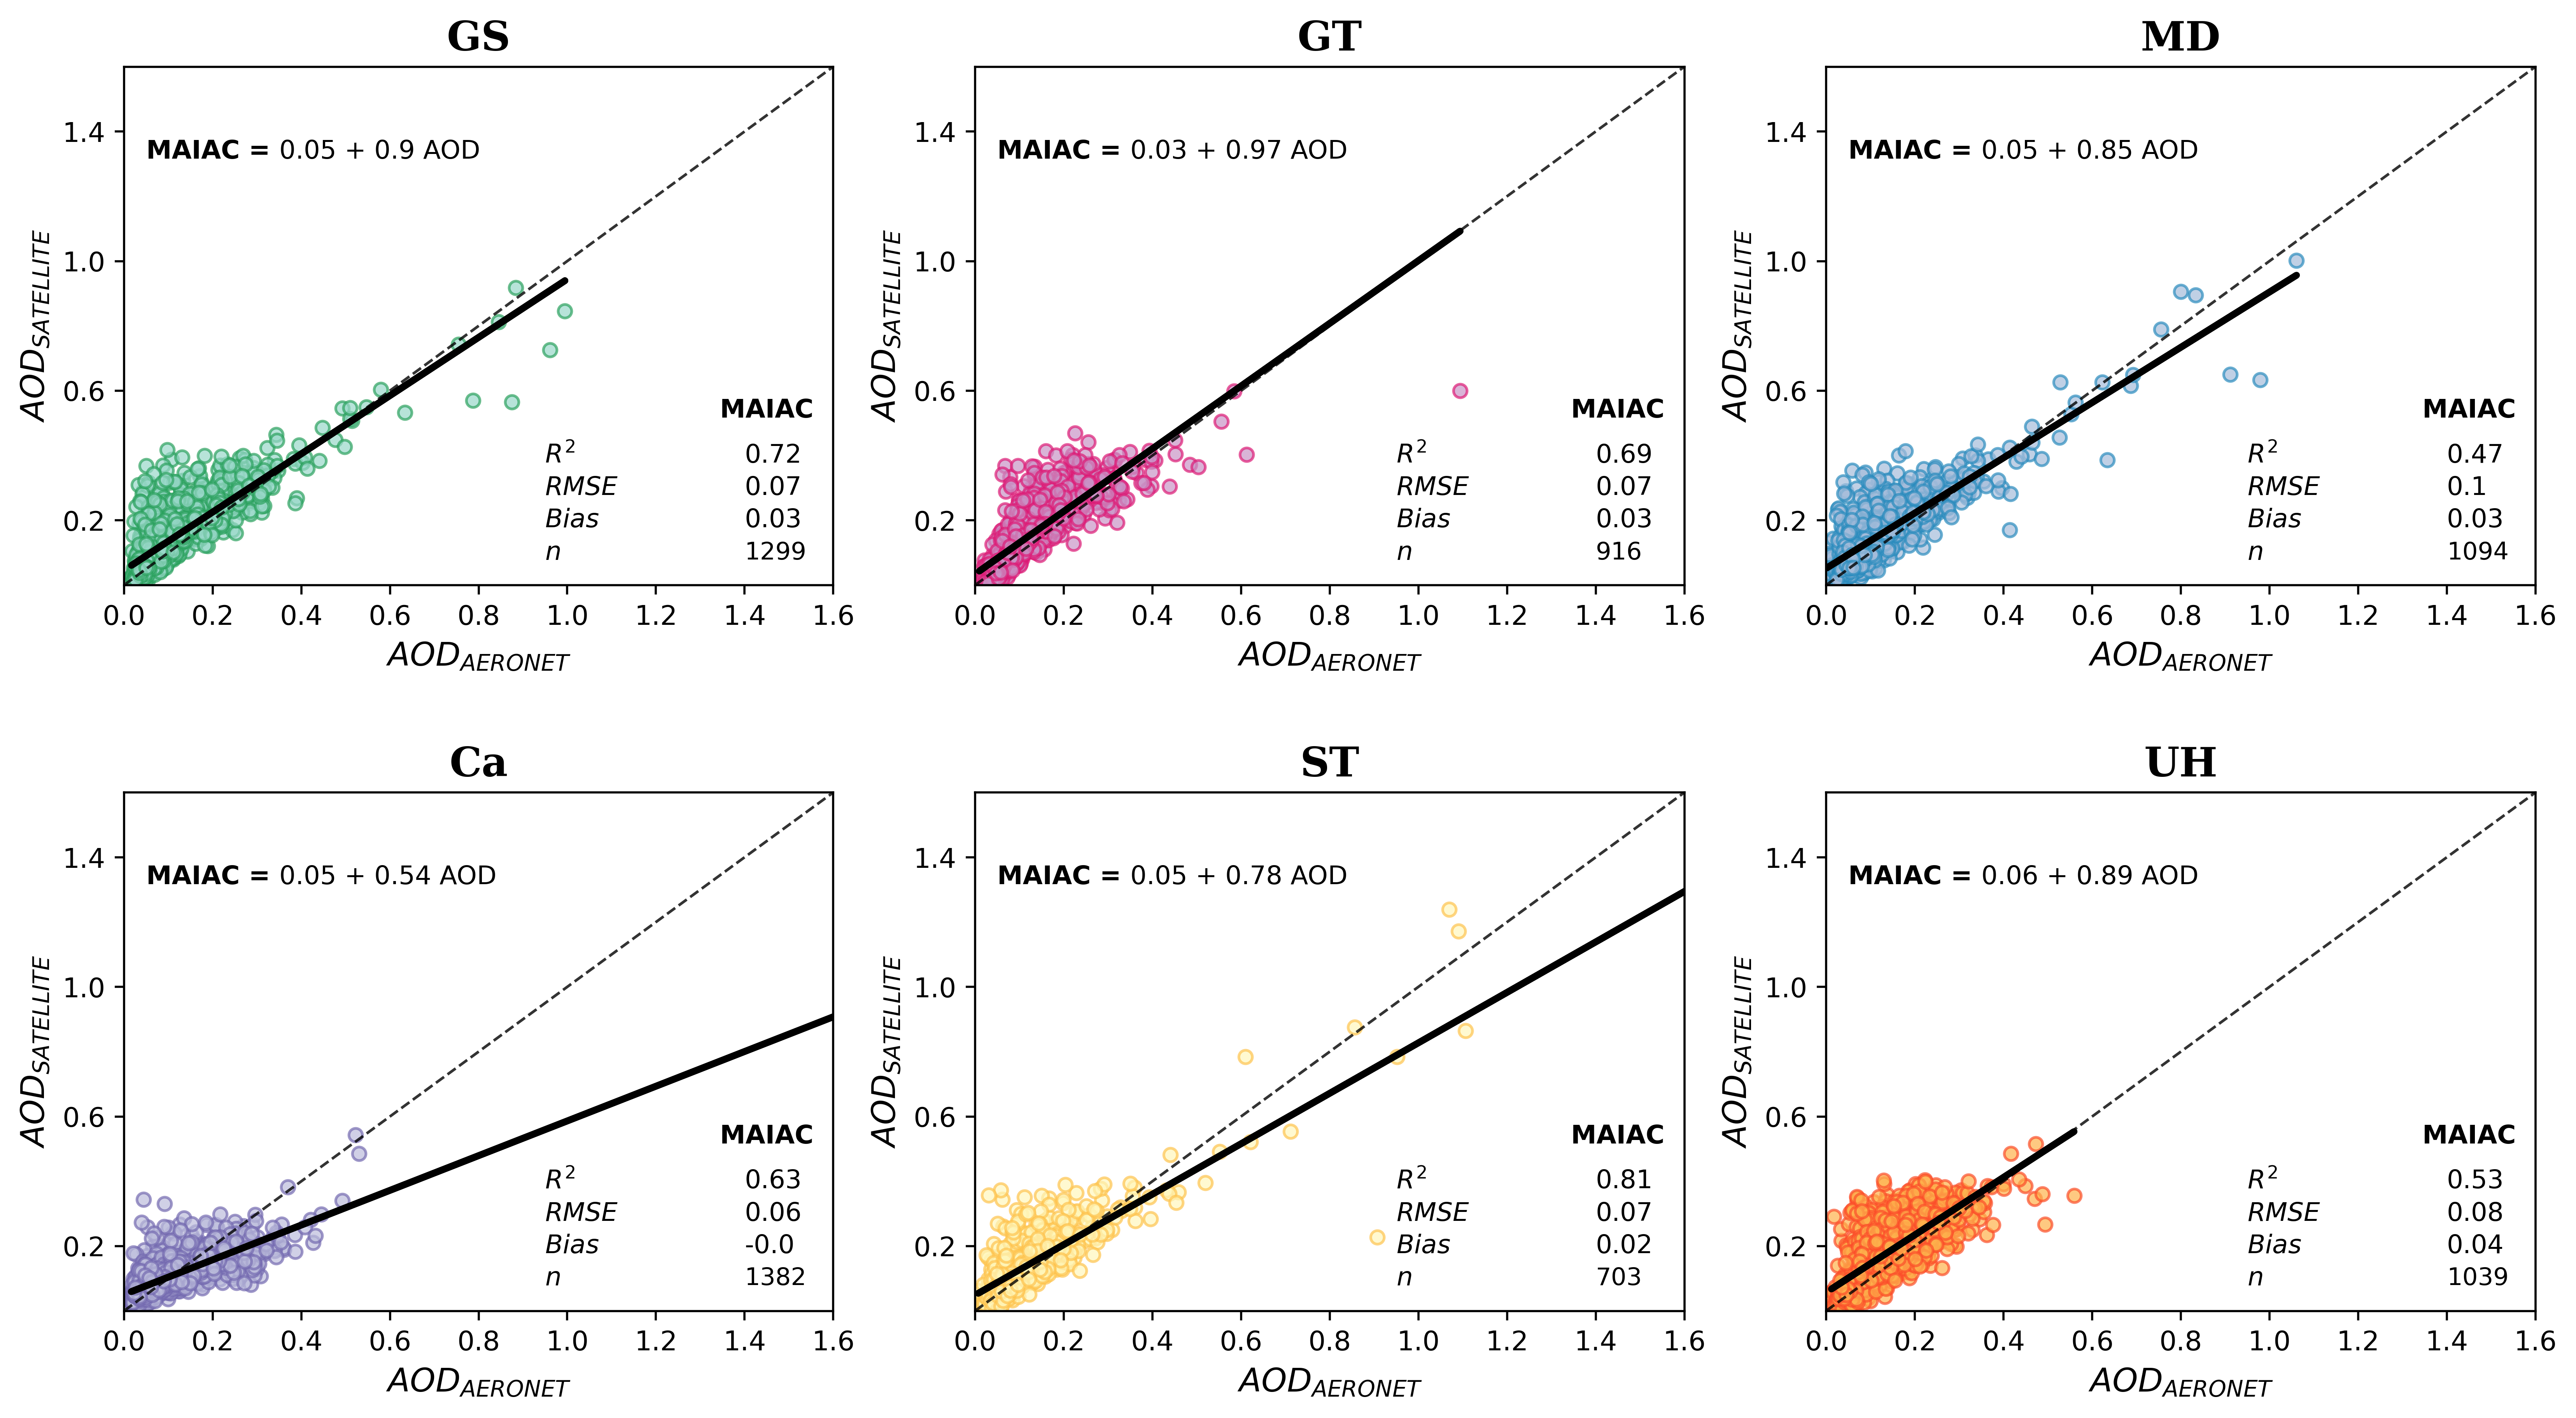

In [5]:
linear_regression_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/processed/USA/",date_format='%d/%m/%Y',nrows=2,ncols=3,color_modis = ["#2ca25f","#dd1c77","#2b8cbe","#756bb1","#fec44f" ,"#fc4e2a"],color_maiac = ["#99d8c9","#c994c7" ,"#a6bddb","#bcbddc","#fff7bc", "#feb24c"],plot='na')

In [4]:
# estadisticas basicas
data_GS = pd.read_csv("D:/Josefina/paper_git/paper_maiac/datasets/processed/USA/1_GSFC-25KM-MAIAC-60-AER_MEAN.csv")
data_GS.describe()
data_GS_AER = pd.read_csv("D:/Josefina/paper_git/paper_maiac/datasets/aeronet/USA/1_GSFC-2015-2022_interp-s.csv")
data_GS_AER.describe()


,aod_550,aod_550_2,aod_550.1,aod_550_mod
count,87108.000000,87119.000000,86897.000000,87127.000000
mean,0.110526,0.111209,0.111392,0.111024
std,0.102479,0.102883,0.103109,0.102791
min,0.012605,0.012832,0.012761,0.012733
25%,0.050519,0.050824,0.050882,0.050735
50%,0.079457,0.080051,0.080076,0.079862
75%,0.136602,0.137578,0.137868,0.137283
max,1.706217,1.708697,1.710231,1.708382


In [5]:
data_MDC = pd.read_csv("D:/Josefina/paper_git/paper_maiac/datasets/processed/USA/3_MDC-25KM-MAIAC-60-AER_MEAN.csv")
data_MDC.describe()
data_MDC_AER = pd.read_csv("D:/Josefina/paper_git/paper_maiac/datasets/aeronet/USA/3_MDScience_C_interp-s.csv")
data_MDC_AER.describe()

,aod_550,aod_550_2,aod_550.1,aod_550_mod
count,67293.000000,67292.000000,67268.000000,67304.000000
mean,0.114835,0.115232,0.115275,0.115112
std,0.109980,0.110411,0.110578,0.110313
min,0.000027,0.000007,0.000005,0.000013
25%,0.054555,0.054608,0.054628,0.054604
50%,0.083139,0.083414,0.083409,0.083315
75%,0.136158,0.136915,0.136978,0.136641
max,1.375168,1.378319,1.380496,1.377994


In [6]:
data_Ca = pd.read_csv("D:/Josefina/paper_git/paper_maiac/datasets/processed/USA/4_CalTECH-25KM-MAIAC-60-AER_MEAN.csv")
data_Ca.describe()
data_Ca_AER = pd.read_csv("D:/Josefina/paper_git/paper_maiac/datasets/aeronet/USA/4_CalTech-2015-2022_interp-s.csv")
data_Ca_AER.describe()

,aod_550,aod_550_2,aod_550.1,aod_550_mod
count,117540.000000,117626.000000,116517.000000,117631.000000
mean,0.103927,0.104672,0.105193,0.104458
std,0.085094,0.085368,0.085536,0.085332
min,0.007710,0.008103,0.010700,0.007907
25%,0.054111,0.054649,0.055141,0.054476
50%,0.086192,0.086866,0.087407,0.086645
75%,0.133605,0.134500,0.135014,0.134247
max,4.012580,4.020454,4.027346,4.020127


In [7]:

data_GT = pd.read_csv("D:/Josefina/paper_git/paper_maiac/datasets/processed/USA/2_GTECH-25KM-MAIAC-60-AER_MEAN.csv")
data_GT.describe()
data_GT_AER = pd.read_csv("D:/Josefina/paper_git/paper_maiac/datasets/aeronet/USA/2_GTech-2015-2022_interp-s.csv")
data_GT_AER.describe()

,aod_550,aod_550_2,aod_550.1,aod_550_mod
count,48755.000000,48756.000000,48733.000000,48768.000000
mean,0.109169,0.110106,0.110290,0.109864
std,0.090385,0.090753,0.090850,0.090665
min,0.009649,0.009246,0.009111,0.009335
25%,0.049292,0.049851,0.050038,0.049739
50%,0.082562,0.083541,0.083712,0.083282
75%,0.139635,0.140917,0.141102,0.140591
max,1.791037,1.785943,1.786172,1.787717


In [8]:
data_st = pd.read_csv("D:/Josefina/paper_git/paper_maiac/datasets/processed/USA/5_STL-25KM-MAIAC-60-AER_MEAN.csv")
data_st.describe()
data_ST_AER = pd.read_csv("D:/Josefina/paper_git/paper_maiac/datasets/aeronet/USA/5_STL-2015-2022_interp-s.csv")
data_ST_AER.describe()

,aod_550,aod_550_2,aod_550.1,aod_550_mod
count,40680.000000,40644.000000,40318.000000,40736.000000
mean,0.120990,0.121674,0.120887,0.121418
std,0.154649,0.155166,0.153812,0.154934
min,0.002653,0.001805,0.001572,0.002025
25%,0.050006,0.050123,0.049850,0.050064
50%,0.082308,0.082845,0.082856,0.082675
75%,0.140965,0.142043,0.141430,0.141679
max,3.717639,3.726546,3.731511,3.725232


In [9]:
data_uh = pd.read_csv("D:/Josefina/paper_git/paper_maiac/datasets/processed/USA/6_UH-25KM-MAIAC-60-AER_MEAN.csv")
data_uh.describe()

data_uh_AER = pd.read_csv("D:/Josefina/paper_git/paper_maiac/datasets/aeronet/USA/6_UH-2015-2022_interp-s.csv")
data_uh_AER.describe()

,aod_550,aod_550_2,aod_550.1,aod_550_mod
count,55852.000000,55848.000000,55828.000000,55860.000000
mean,0.121828,0.122623,0.122854,0.122434
std,0.081021,0.081326,0.081465,0.081266
min,0.008748,0.008984,0.008848,0.008860
25%,0.061271,0.061874,0.062020,0.061727
50%,0.103479,0.104292,0.104486,0.104123
75%,0.160169,0.161144,0.161484,0.160873
max,1.221880,1.224213,1.226217,1.224041


In [2]:
# AERONET station time series
def aeronet_plot (path, date_format,nrows,ncols,color_modis,color_maiac,plot):
    '''
    The function allows plotting the daily averages of each AERONET station.
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columnas the plot will have
    - color palette for each of AERONET's stations For example: 
    colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"])
    
    '''
    i=0 
    j=0 
    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,6),dpi=500)#figsize=(14,6)
    #The folder where the files of each station are located is browsed.
    for p,files in enumerate(os.listdir(path)):
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        #A column is created with the date called "Timestamp".
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #Becomes the index column
        data.set_index('Timestamp', inplace = True)
        # Media diaria
        data_mean  = data.resample('1D').mean()
        #The days of the study period are completed
        data_mean_period = data_mean ['2015-01-01':'2022-12-31']
        data_mean_period_len =len(data_mean_period.dropna(how='all'))
        # Station Name
        station_name = files [2:4]
        print(files)
        mean = data_mean_period['AOD_550_AER_mean'].mean()    
        ########################                PLOT                ########################
        # Figure
        #ax[i][j].plot(data_mean_period.index, data_mean_period.aod_550,c=colors[p])
        ax[i][j].plot(data_mean_period.index, data_mean_period.AOD_550_AER_mean,c=color_maiac[p],label="AERONET")
        ax[i][j].plot(data_mean_period.index, data_mean_period.AOD_550_maiac_mean,c=color_modis[p],label="MAIAC")

        

        # Daily average text
        #ax[i][j].text(data_mean_period.index[1],1.3, "Average =" +" "+ str(round(data_mean_period['AOD_550_AER_mean'].mean(),2)),  
         #   ha="left", va="center",fontdict={'family': 'serif', 
          #  'color' : 'Black',
           # 'size': 9})
        
        # Daily average line
        #ax[i][j].axhline(y=mean, color= "black",linewidth=1.5, alpha=0.6, linestyle = '-')
        
        # Daily lenth text
        ax[i][j].text(data_mean_period.index[1],1.2, "n =" +" "+ str(data_mean_period_len),  
            ha="left", va="center",fontdict={'family': 'serif', 
            'color' : 'Black',
            #'weight': 'bold',
            'size': 9})
        # Axes names
        #ax[i][j].set_xlabel(r'$AOD_{Date}$',size=10)
        ax[i][j].set_xlabel(r'Date',size=10)
        #ax[i][j].set_ylabel(r'$AOD_{AERONET}$',size=10)
        ax[i][j].set_ylabel(r'$AOD$',size=10)
        #Ticks
        ax[i][j].yaxis.set_ticks(np.arange(0.2, 1.6, 0.4))
        
        # Title of each subplot corresponds to the name of the AERONET station.
        ax[i][j].set_title(station_name,fontsize=13,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 16})
        # Day fotmat
        Format = mdates.DateFormatter('%m-%y')
        ax[i][j].xaxis.set_major_formatter(Format)
        ax[i][j].xaxis.set_major_locator(ticker.AutoLocator())
        ax[i][j].xaxis.set_minor_locator(ticker.AutoMinorLocator())
        ax[i][j].set_ylim(0,1.4)
        #ax[i][j].set_xlim('01-2015','12-2022')

        ax[i][j].set_xlim(pd.Timestamp('2014-10-01'), pd.Timestamp('2023-02-28'))
        #ax[i][j].set_xlim(pd.Timestamp('2014-10-01'), pd.Timestamp('2023-01-01'))
        # Configuration of subplots
        plt.subplots_adjust(left=0.125,
                   bottom=0.15, 
                   right=0.9, 
                   top=0.9, 
                   wspace=0.2, 
                   hspace=0.4)
        
#         plt.subplots_adjust(left=0.15,
#                     bottom=0.17, 
#                     right=1.1, 
#                     top=1.1, 
#                     wspace=0.4, 
#                     hspace=0.6)
        
        # Location of data in each subplot
        print(station_name)
        ax[i][j].legend(frameon = False, markerfirst = False, fontsize = 10,loc='upper right')
        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
   # Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("aeronet_plot2.jpg", dpi=500))
    else:
        return(plt.show())

1_GSFC-25KM-MAIAC-60-AER_MEAN.csv
GS
2_GTECH-25KM-MAIAC-60-AER_MEAN.csv
GT
3_MDC-25KM-MAIAC-60-AER_MEAN.csv
MD
4_CalTECH-25KM-MAIAC-60-AER_MEAN.csv
Ca
5_STL-25KM-MAIAC-60-AER_MEAN.csv
ST
6_UH-25KM-MAIAC-60-AER_MEAN.csv
UH


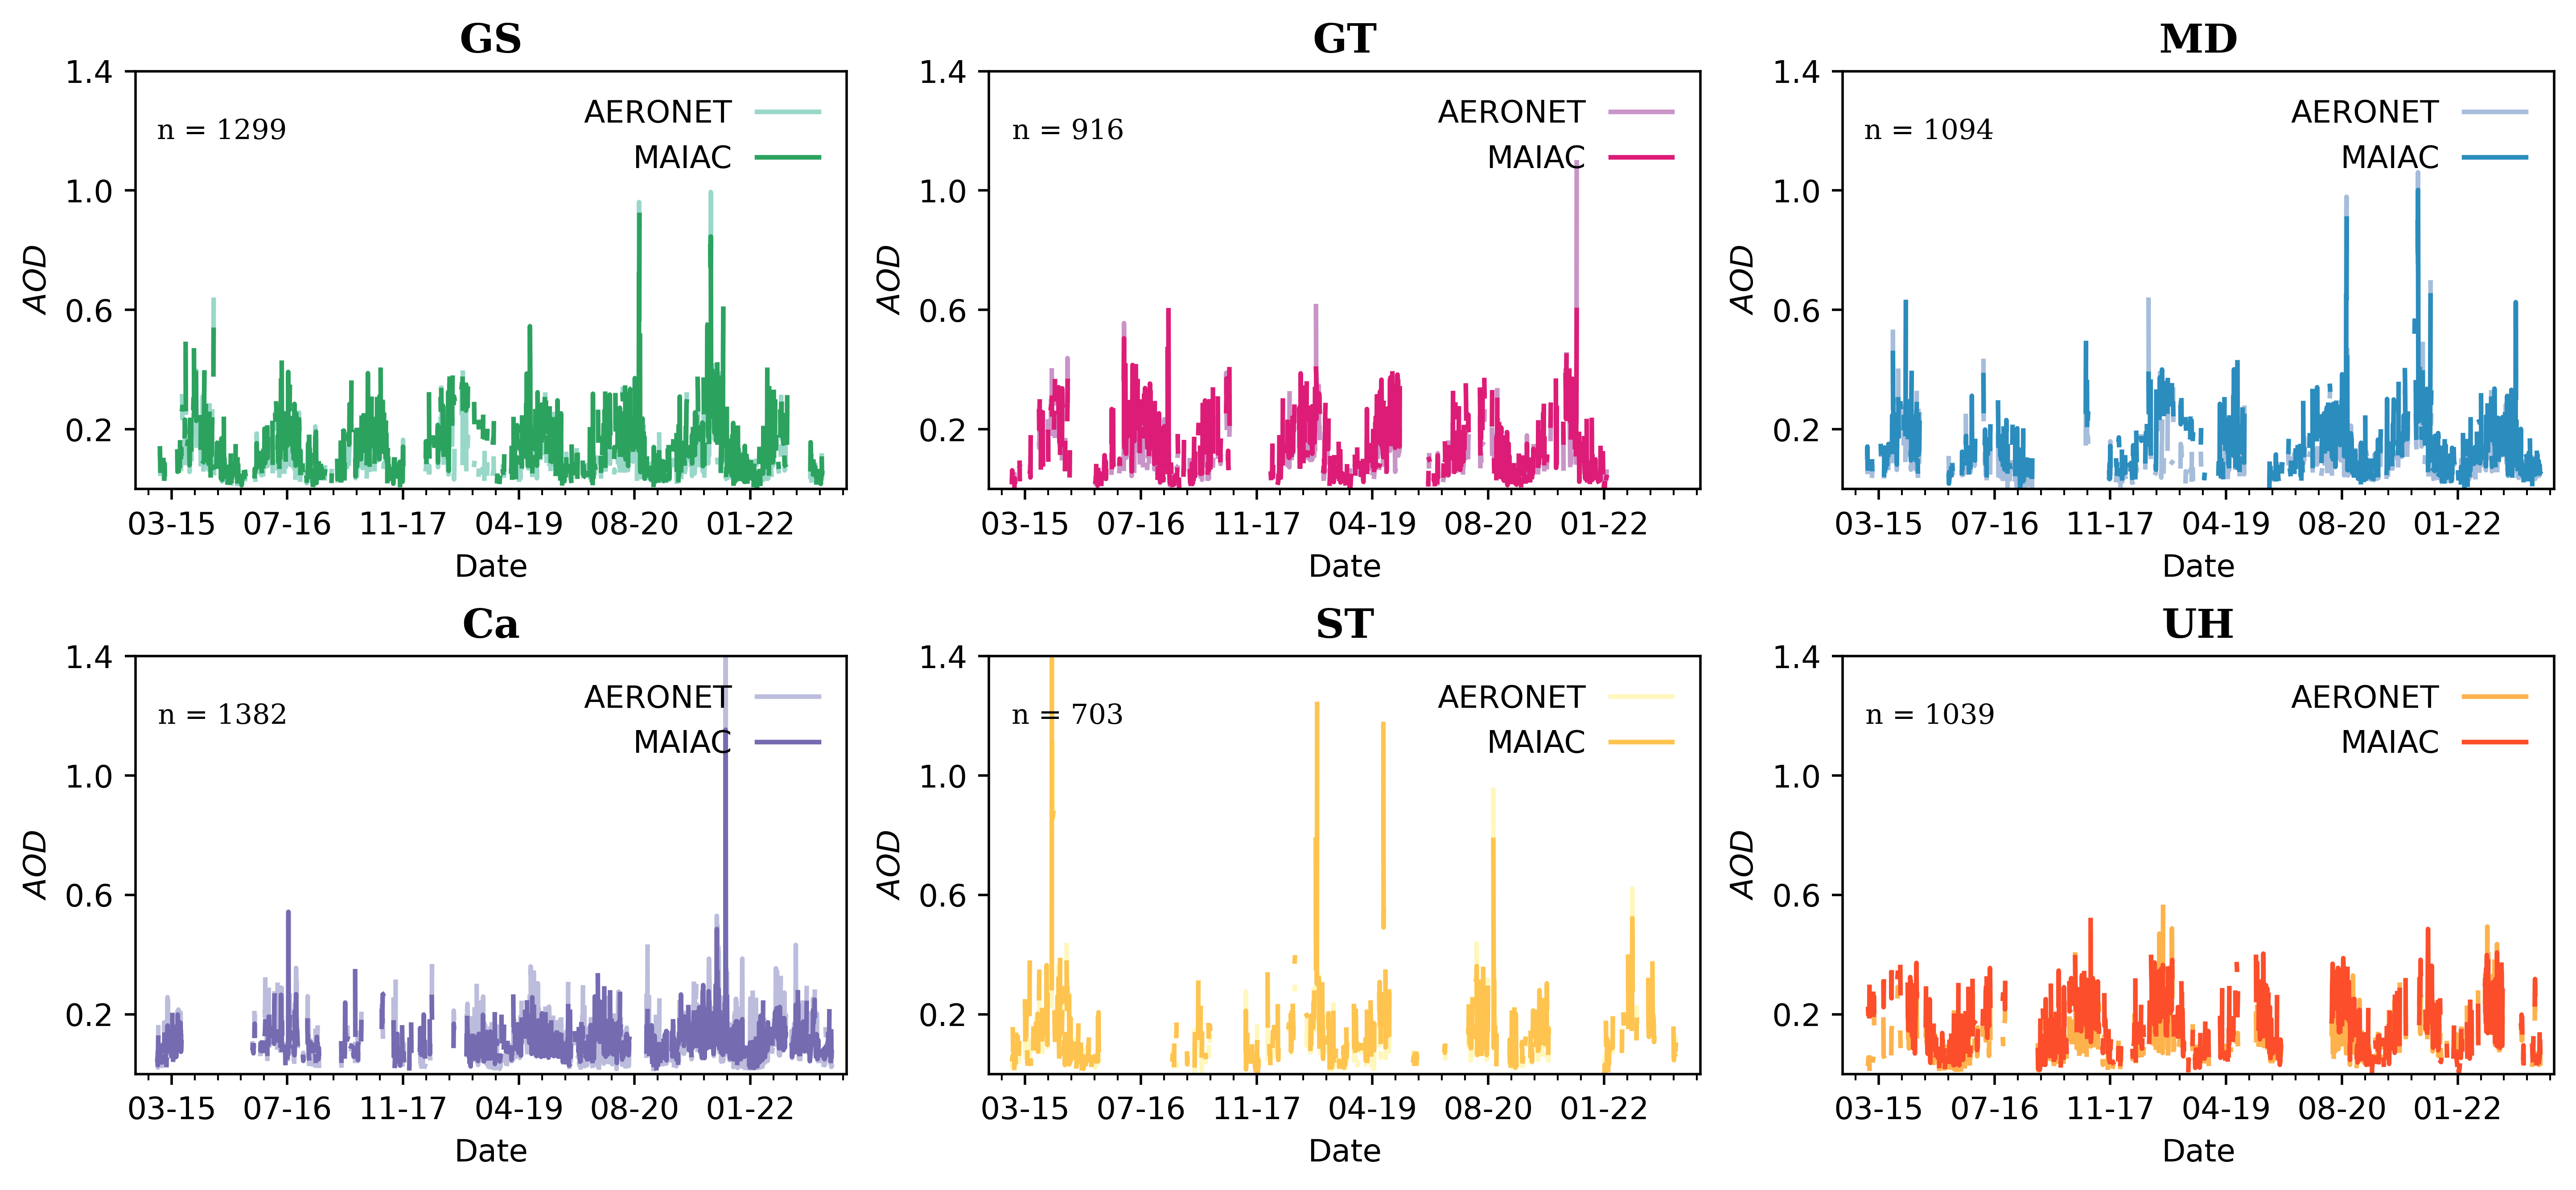

In [3]:
aeronet_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/processed/USA",date_format='%d/%m/%Y',nrows=2,ncols=3,color_modis = ["#2ca25f","#dd1c77","#2b8cbe","#756bb1","#fec44f" ,"#fc4e2a"],color_maiac = ["#99d8c9","#c994c7" ,"#a6bddb","#bcbddc","#fff7bc", "#feb24c"], plot='LALA')


In [4]:
# AERONET station time series
def aeronet_plot_mes (path, date_format,nrows,ncols,color_modis,color_maiac,plot):
    '''
    The function allows plotting the daily averages of each AERONET station.
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columnas the plot will have
    - color palette for each of AERONET's stations For example: 
    colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"])
    
    '''
    i=0 
    j=0 
    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,6),dpi=500)#figsize=(14,6)
    #The folder where the files of each station are located is browsed.
    for p,files in enumerate(os.listdir(path)):
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        #A column is created with the date called "Timestamp".
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #Becomes the index column
        data.set_index('Timestamp', inplace = True)
        # Media diaria
        data_mean  = data.resample('1M').mean()
        #The days of the study period are completed
        data_mean_period = data_mean ['2015-01-01':'2022-12-31']
        data_mean_period_len =len(data_mean_period.dropna(how='all'))
        # Station Name
        station_name = files [2:4]
        print(files)
        mean = data_mean_period['AOD_550_AER_mean'].mean()    
        ########################                PLOT                ########################
        # Figure
        #ax[i][j].plot(data_mean_period.index, data_mean_period.aod_550,c=colors[p])
        
        ax[i][j].plot(data_mean_period.index, data_mean_period.AOD_550_AER_mean,c=color_maiac[p],label="AERONET")
        
        ax[i][j].plot(data_mean_period.index, data_mean_period.AOD_550_maiac_mean,c=color_modis[p],label="MAIAC")
        # Daily average text
        #ax[i][j].text(data_mean_period.index[1],1.3, "Average =" +" "+ str(round(data_mean_period['AOD_550_AER_mean'].mean(),2)),  
         #   ha="left", va="center",fontdict={'family': 'serif', 
          #  'color' : 'Black',
           # 'size': 9})
        
        # Daily average line
        #ax[i][j].axhline(y=mean, color= "black",linewidth=1.5, alpha=0.6, linestyle = '-')
        
        # Daily lenth text
        ax[i][j].text(data_mean_period.index[1],1.2, "n =" +" "+ str(data_mean_period_len),  
            ha="left", va="center",fontdict={'family': 'serif', 
            'color' : 'Black',
            #'weight': 'bold',
            'size': 9})
        # Axes names
        #ax[i][j].set_xlabel(r'$AOD_{Date}$',size=10)
        ax[i][j].set_xlabel(r'Date',size=10)
        ax[i][j].set_ylabel(r'$AOD$',size=10)
        
        #Ticks
        ax[i][j].yaxis.set_ticks(np.arange(0.2, 1.6, 0.4))
        
        # Title of each subplot corresponds to the name of the AERONET station.
        ax[i][j].set_title(station_name,fontsize=13,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 16})
        # Day fotmat
        Format = mdates.DateFormatter('%m-%y')
        ax[i][j].xaxis.set_major_formatter(Format)
        ax[i][j].xaxis.set_major_locator(ticker.AutoLocator())
        ax[i][j].xaxis.set_minor_locator(ticker.AutoMinorLocator())
        ax[i][j].set_ylim(0,1.4)
        #ax[i][j].set_xlim('01-2015','12-2022')

        ax[i][j].set_xlim(pd.Timestamp('2014-10-01'), pd.Timestamp('2023-02-28'))
        #ax[i][j].set_xlim(pd.Timestamp('2014-10-01'), pd.Timestamp('2023-01-01'))
        # Configuration of subplots
        plt.subplots_adjust(left=0.125,
                   bottom=0.15, 
                   right=0.9, 
                   top=0.9, 
                   wspace=0.2, 
                   hspace=0.4)
        
#         plt.subplots_adjust(left=0.15,
#                     bottom=0.17, 
#                     right=1.1, 
#                     top=1.1, 
#                     wspace=0.4, 
#                     hspace=0.6)
        
        # Location of data in each subplot
        print(station_name)
        ax[i][j].legend(frameon = False, markerfirst = False, fontsize = 10,loc='upper right')
        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
   # Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("aeronet_plot2.jpg", dpi=500))
    else:
        return(plt.show())

1_GSFC-25KM-MAIAC-60-AER_MEAN.csv
GS
2_GTECH-25KM-MAIAC-60-AER_MEAN.csv
GT
3_MDC-25KM-MAIAC-60-AER_MEAN.csv
MD
4_CalTECH-25KM-MAIAC-60-AER_MEAN.csv
Ca
5_STL-25KM-MAIAC-60-AER_MEAN.csv
ST
6_UH-25KM-MAIAC-60-AER_MEAN.csv
UH


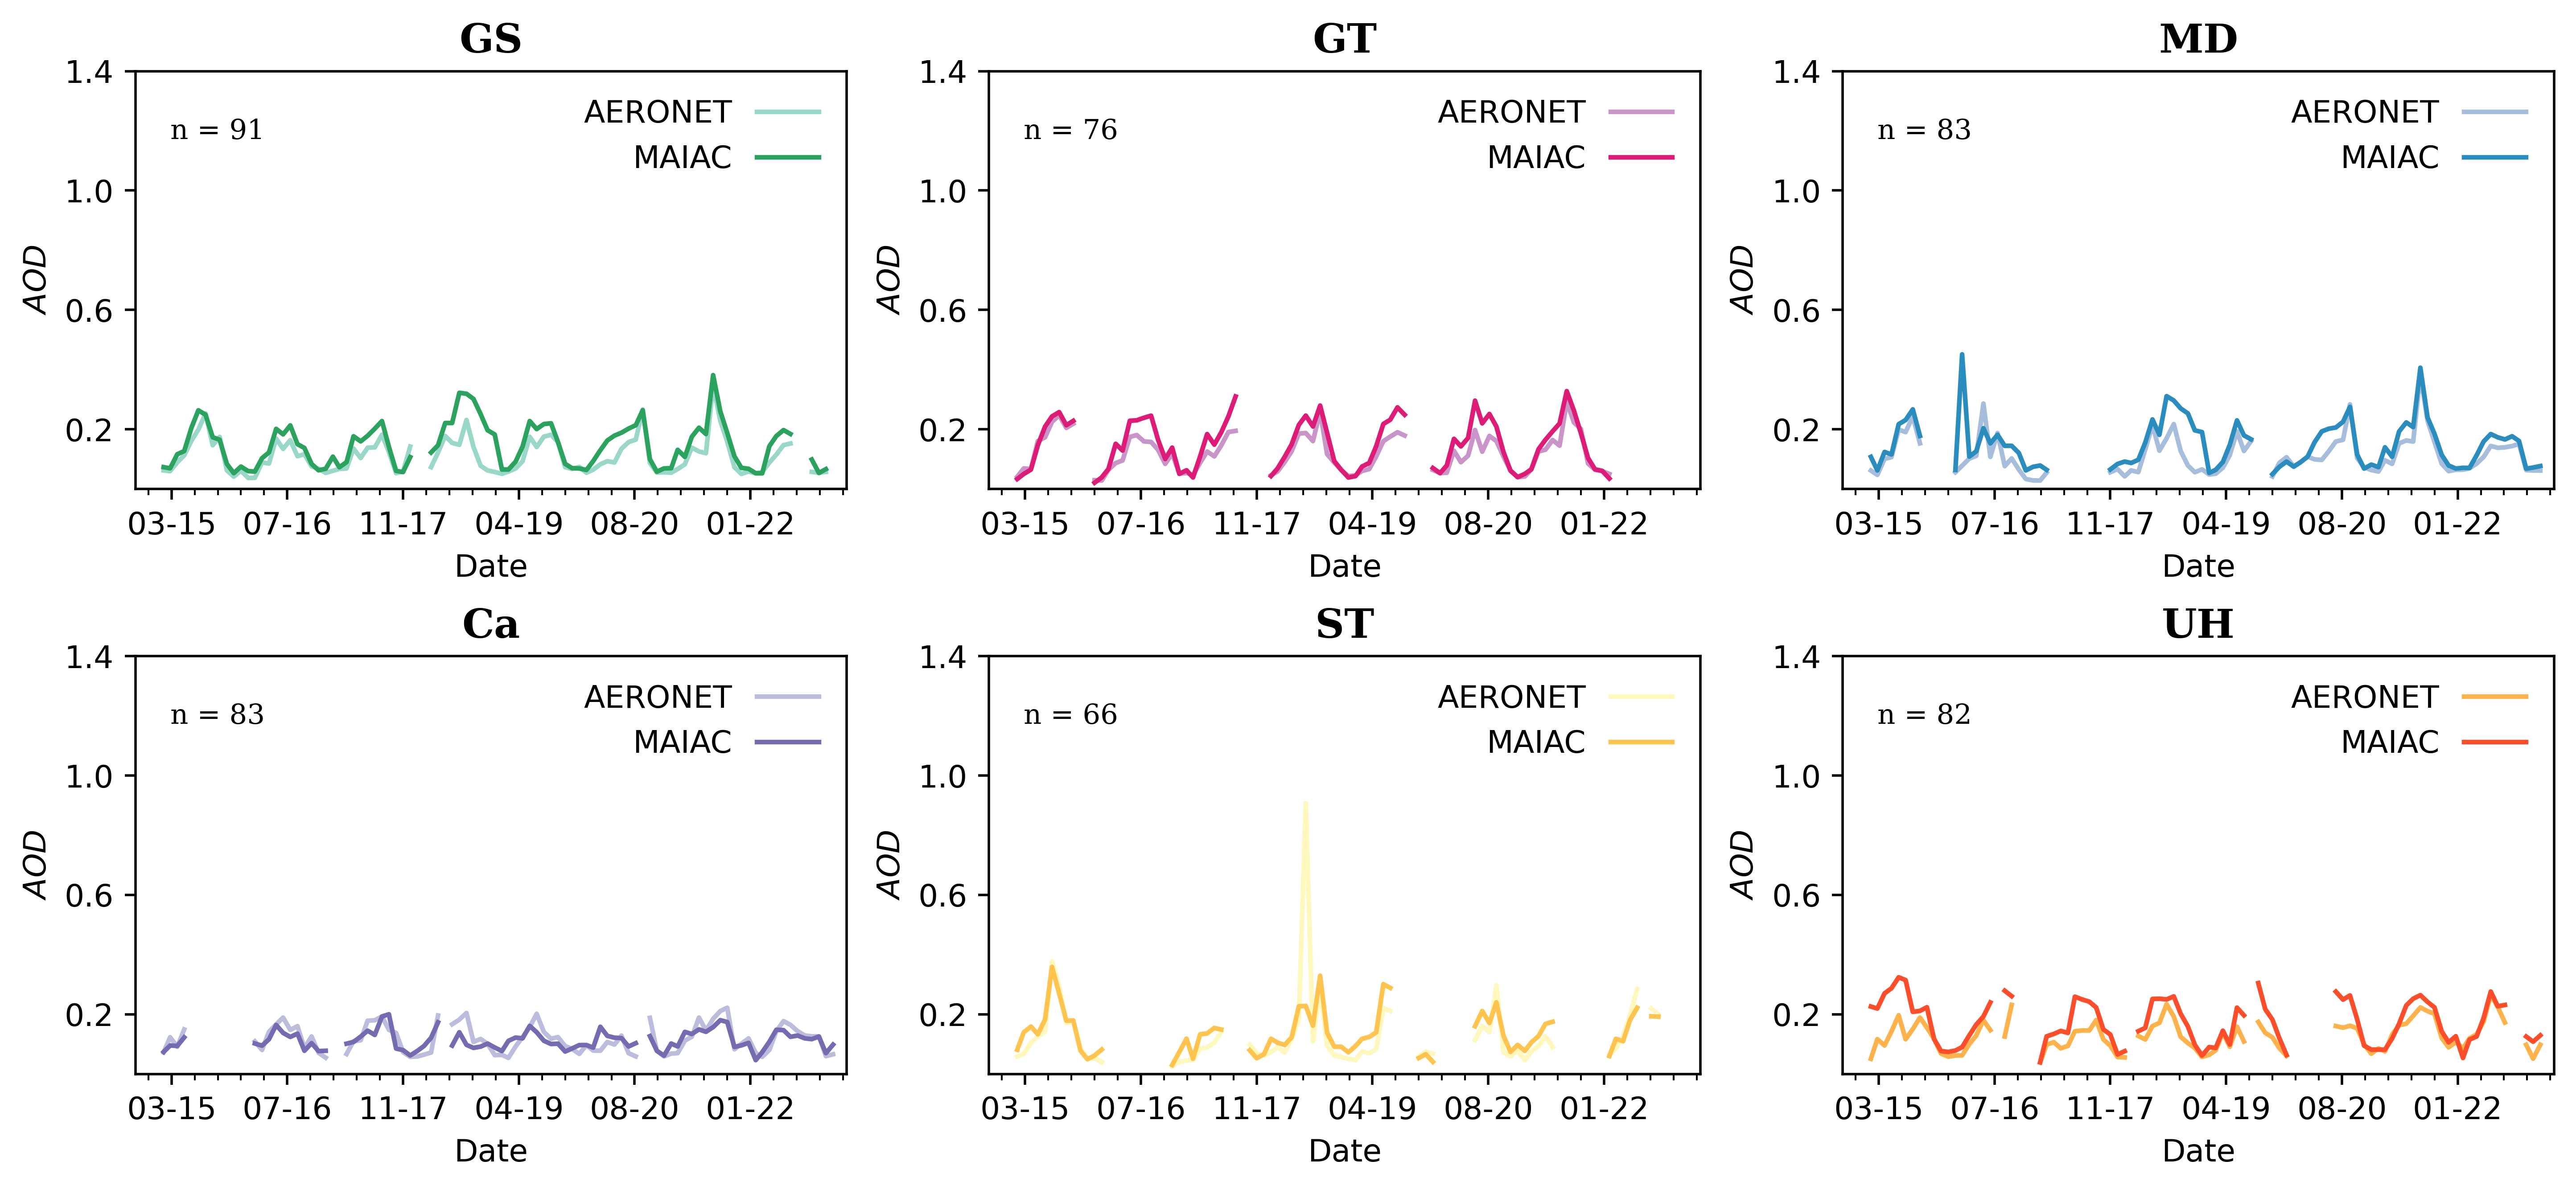

In [5]:
aeronet_plot_mes (path="D:/Josefina/paper_git/paper_maiac/datasets/processed/USA",date_format='%d/%m/%Y',nrows=2,ncols=3,color_modis = ["#2ca25f","#dd1c77","#2b8cbe","#756bb1","#fec44f" ,"#fc4e2a"],color_maiac = ["#99d8c9","#c994c7" ,"#a6bddb","#bcbddc","#fff7bc", "#feb24c"], plot='LALA')


In [ ]:
plot.hist(x=edades, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plot.title('Histograma de edades - matplotlib - codigopiton.com')
plot.xlabel('Edades')
plot.ylabel('Frecuencia')
plot.xticks(intervalos)

plot.show() #dibujamos el histograma